In [1]:
import pandas as pd
import os
from tqdm import tqdm
from datetime import datetime

In [2]:
os.chdir(r"E:\git\machine-learning-option-pricing\historical_data\historitcal_alphaVantage_generation")
store = pd.HDFStore(r'alphaVantage vanillas.h5')
contract_keys = [key for key in store.keys() if 'contracts' in key]
store.close()

HDF5ExtError: HDF5 error back trace

  File "D:\bld\hdf5_1717586849786\work\src\H5F.c", line 836, in H5Fopen
    unable to synchronously open file
  File "D:\bld\hdf5_1717586849786\work\src\H5F.c", line 796, in H5F__open_api_common
    unable to open file
  File "D:\bld\hdf5_1717586849786\work\src\H5VLcallback.c", line 3863, in H5VL_file_open
    open failed
  File "D:\bld\hdf5_1717586849786\work\src\H5VLcallback.c", line 3675, in H5VL__file_open
    open failed
  File "D:\bld\hdf5_1717586849786\work\src\H5VLnative_file.c", line 128, in H5VL__native_file_open
    unable to open file
  File "D:\bld\hdf5_1717586849786\work\src\H5Fint.c", line 1910, in H5F_open
    unable to lock the file
  File "D:\bld\hdf5_1717586849786\work\src\H5FD.c", line 2412, in H5FD_lock
    driver lock request failed
  File "D:\bld\hdf5_1717586849786\work\src\H5FDsec2.c", line 941, in H5FD__sec2_lock
    unable to lock file, errno = 0, error message = 'No error', Win32 GetLastError() = 33

End of HDF5 error back trace

Unable to open/create file 'alphaVantage vanillas.h5'

In [3]:
start_date = datetime(2018,1,1)
# end_date = datetime(2024,1,1)
end_date = datetime.today()
contract_keys = [key for key in contract_keys if start_date <= datetime.strptime(key[key.find('date')+5:],'%Y_%m_%d') <= end_date]

NameError: name 'contract_keys' is not defined

In [4]:
store.open()
dfs = []
bar = tqdm(total = len(contract_keys),leave=False)
for key in contract_keys:
    dfs.append(store[key])
    dfs.append(store[key])
    bar.update(1)
bar.close()
store.close()

In [5]:
df = pd.concat(dfs,ignore_index=True)
df

,strike_price,volatility,w,bid,ask,calculation_date,expiration_date,mid,spot_price,days_to_maturity
0,235.0,0.92408,put,0.00,0.01,2018-01-02,2018-01-03,0.005,268.105,1
1,240.0,0.79161,put,0.00,0.01,2018-01-02,2018-01-03,0.005,268.105,1
2,242.5,0.72576,put,0.00,0.01,2018-01-02,2018-01-03,0.005,268.105,1
3,245.0,0.66021,put,0.00,0.01,2018-01-02,2018-01-03,0.005,268.105,1
4,247.5,0.59467,put,0.00,0.01,2018-01-02,2018-01-03,0.005,268.105,1
...,...,...,...,...,...,...,...,...,...,...
17532597,820.0,0.10931,call,2.08,3.34,2024-07-18,2026-12-18,2.710,554.975,883
17532598,825.0,0.11084,call,2.26,3.11,2024-07-18,2026-12-18,2.685,554.975,883
17532599,830.0,0.11068,call,2.00,2.90,2024-07-18,2026-12-18,2.450,554.975,883
17532600,835.0,0.10946,call,1.59,2.71,2024-07-18,2026-12-18,2.150,554.975,883


In [6]:
spots = df.set_index('calculation_date')['spot_price'].drop_duplicates().copy()
spots

calculation_date
2018-01-02    268.10500
2018-01-03    269.80000
2018-01-04    271.35000
2018-01-05    272.75500
2018-01-08    273.54000
                ...    
2024-07-11    559.08000
2024-07-12    560.41000
2024-07-15    562.23355
2024-07-17    558.56000
2024-07-18    554.97500
Name: spot_price, Length: 1020, dtype: float64

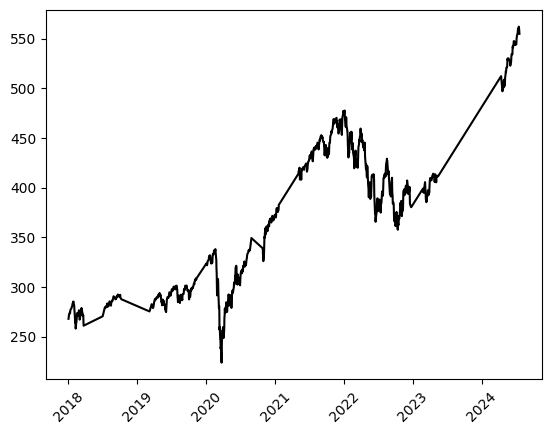

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(spots,color='black')
plt.xticks(rotation=45)
plt.show()
plt.clf()